In [1]:
# pip install opencv-python ultralytics
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# from google.colab.patches import cv2_imshow # Import cv2_imshow for Colabmodel = YOLO("yolov9c.pt")
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
model = YOLO("yolov9c.pt")

In [3]:
import os
print(os.getcwd())

def list_folders(path='.'):  # Default to current directory if no path provided
    """Prints the folders under the given path."""
    for entry in os.listdir(path):
        full_path = os.path.join(path, entry)
        if os.path.isdir(full_path):
            print(entry)

# Call the function to list folders under the current path
list_folders()

/Users/hongbo_wei/Downloads/GitHub/computer-vision
.git


In [5]:
# functions to predict and detect objects in images and videos
def predict(chosen_model, img, classes=[], conf=0.5):
    if classes:
        results = chosen_model.predict(img, classes=classes, conf=conf)
    else:
        results = chosen_model.predict(img, conf=conf)

    return results

def predict_and_detect(chosen_model, img, classes=[], conf=0.5, rectangle_thickness=2, text_thickness=1):
    results = predict(chosen_model, img, classes, conf=conf)
    for result in results:
        for box in result.boxes:
            cv2.rectangle(img, (int(box.xyxy[0][0]), int(box.xyxy[0][1])),
                          (int(box.xyxy[0][2]), int(box.xyxy[0][3])), (255, 0, 0), rectangle_thickness)
            cv2.putText(img, f"{result.names[int(box.cls[0])]}",
                        (int(box.xyxy[0][0]), int(box.xyxy[0][1]) - 10),
                        cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), text_thickness)
    return img, results


0: 384x640 2 persons, 1 tie, 142.1ms
Speed: 1.4ms preprocess, 142.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


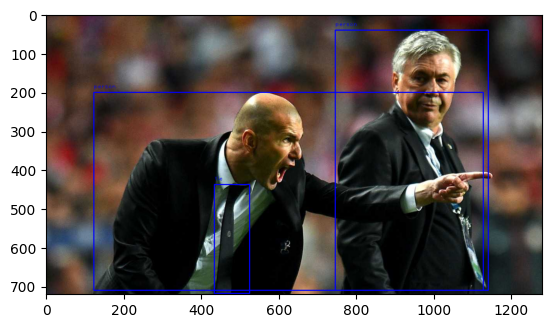

In [6]:
# read the image
url = "zidane.jpg"

image = cv2.imread(url)

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not read the image. Please check the file path or URL.")
else:
    result_img, _ = predict_and_detect(model, image, classes=[], conf=0.5)

    # Check if result_img is valid before displaying
    if result_img is not None:
        # Display the image using cv2.imshow
        # cv2.imshow("Image", result_img)
        # cv2.imwrite("SaveImage.jpg", result_img) # Add a file extension to the save path
        # cv2.waitKey(0)  # Not needed in Colab
        
        img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

        plt.imshow(img_rgb)
        plt.show()
    else:
        print("Error: 'predict_and_detect' function returned None for the image.")

In [ ]:
# Detecting Objects in Videos with YOLOv9
video_path = r"YourVideoPath"
cap = cv2.VideoCapture(video_path)
while True:
    success, img = cap.read()
    if not success:
        break
    result_img, _ = predict_and_detect(model, img, classes=[], conf=0.5)
    cv2.imshow("Image", result_img)

    cv2.waitKey(1)

In [ ]:
# defining function for creating a writer (for mp4 videos)
def create_video_writer(video_cap, output_filename):
    # grab the width, height, and fps of the frames in the video stream.
    frame_width = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(video_cap.get(cv2.CAP_PROP_FPS))
    # initialize the FourCC and a video writer object
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    writer = cv2.VideoWriter(output_filename, fourcc, fps,
                             (frame_width, frame_height))
    return writer

In [ ]:
utput_filename = "YourFilename"
writer = create_video_writer(cap, output_filename)

video_path = r"YourVideoPath"
cap = cv2.VideoCapture(video_path)
while True:
    success, img = cap.read()
    if not success:
        break
    result_img, _ = predict_and_detect(model, img, classes=[], conf=0.5)
    writer.write(result_img)
    cv2.imshow("Image", result_img)

    cv2.waitKey(1)
writer.release()